<a href="https://colab.research.google.com/github/Rubina-Fathima/zomato-clustering-project/blob/main/zomato_clustering_project_individual_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Name - Zomoto Restaurant Clustering and Sentiment Analysis

##### **Project Type**    - Unsupervised
##### **Team Member 1     - Rubina Fathima** 


# **Project Summary -**

The "Zomoto Restaurant Clustering and Sentiment Analysis" project aims to analyze customer feedback for restaurants on the popular food delivery platform, Zomato. The main objectives of the project are two-fold:

Restaurant Clustering: In this aspect, the project will use unsupervised machine learning techniques such as K-means clustering to group similar restaurants based on various features such as cuisine type, location, rating, and price range. This will help in better understanding the customer preferences and provide insights to restaurants for improving their offerings.

Sentiment Analysis: The project will also perform sentiment analysis on customer reviews to determine their overall sentiment towards the restaurant. This information can help restaurants understand the customer's likes and dislikes and take necessary measures to improve customer satisfaction.

The project will gather data from the Zomato API and pre-process it to remove irrelevant information. The processed data will then be used to perform clustering and sentiment analysis. The results of the analysis will be visualized using appropriate plots and charts for better understanding.

This project will be a valuable resource for restaurants on Zomato as it will help them understand their customers better and make data-driven decisions to improve their offerings. It will also provide insights to customers by highlighting the strengths and weaknesses of restaurants in a particular location or cuisine type.

In conclusion, the "Zomoto Restaurant Clustering and Sentiment Analysis" project is an innovative and practical solution to gather valuable insights from customer feedback on Zomato. The project will help restaurants to improve their offerings and provide a better customer experience, and also help customers in making informed decisions while choosing a restaurant.



# **GitHub Link -** *italicized text*

Provide your GitHub Link here.

# **Problem Statement**

Write Problem Statement Here.
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Attribute Information

##*Zomato Restaurant names and Metadata*
Use this dataset for clustering part

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings


##*Zomato Restaurant reviews*
Merge this dataset with Names and Matadata and then use for sentiment analysis part

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

#Data Cleaning and Pre-Processing 

In [2]:
# importing libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [3]:
#importing datasets
meta_df_main=pd.read_csv("/content/drive/MyDrive/zomato clustering project/Zomato Restaurant names and Metadata.csv")
review_df=pd.read_csv("/content/drive/MyDrive/zomato clustering project/Zomato Restaurant reviews.csv")

In [4]:
meta_df = meta_df_main.copy()

In [5]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
meta_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [7]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [8]:
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [9]:
meta_df[meta_df['Collections'].isnull()].head()

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM


In [10]:
meta_df[meta_df['Timings'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [11]:
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [12]:
# Checking duplicate rows in dataset
meta_df.duplicated(keep='last').sum()

0

In [13]:
# Checking duplicate restaurant name
meta_df['Name'].duplicated().sum()

0

In [14]:
# Changing cost function's data type
meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

# EDA on MetaData Dataset

In [15]:
# EDA on MetaData Dataset
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [16]:
meta_df.shape

(105, 6)

In [17]:
meta_df['Name'].nunique()

105

In [18]:
top_10_costly_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

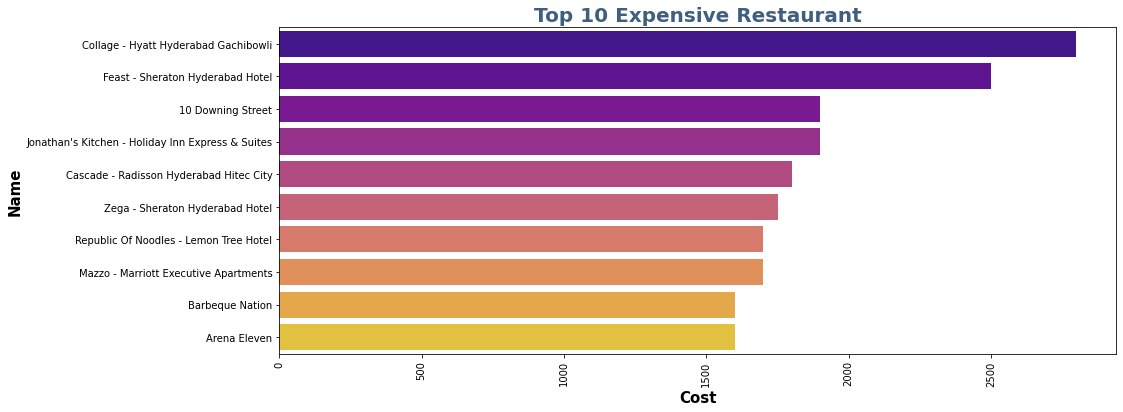

In [19]:
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Name']
plt.title("Top 10 Expensive Restaurant",fontsize=20,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

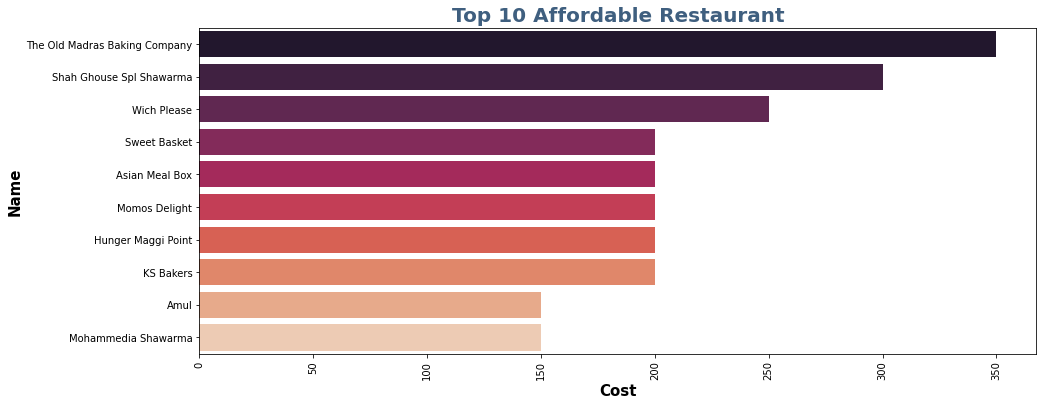

In [20]:
# Affordable price restaurants,here im considering the lowest price retaurants as affordable to all group of customers
plt.figure(figsize=(15,6))
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket')
plt.show()


(-0.5, 1399.5, 1399.5, -0.5)

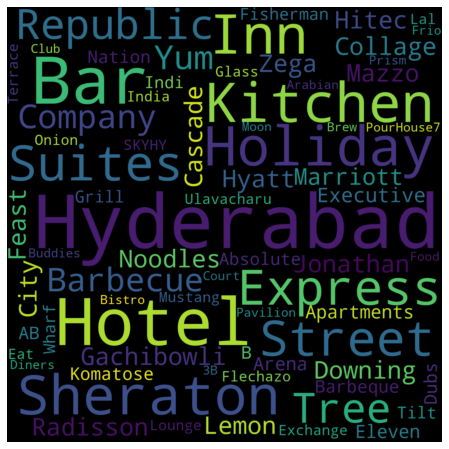

In [21]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations =False , background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

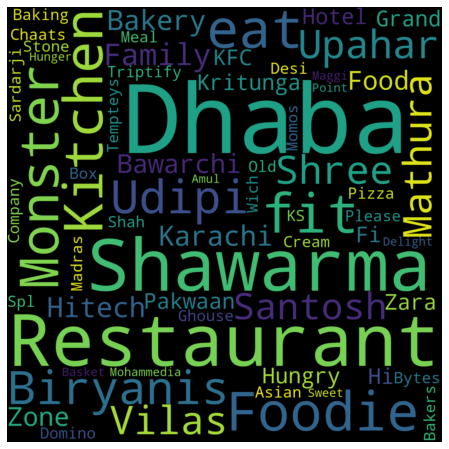

In [22]:
#Creating word cloud for cheap restaurants

plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [25]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [26]:
# Removing stopwords from Cuisines
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [27]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [28]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [29]:
import re

In [30]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [31]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [32]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [33]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [34]:
from collections import Counter 
text = ' '.join(meta_df['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}


In [35]:
word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
word_freq_20 = word_freq[:20]

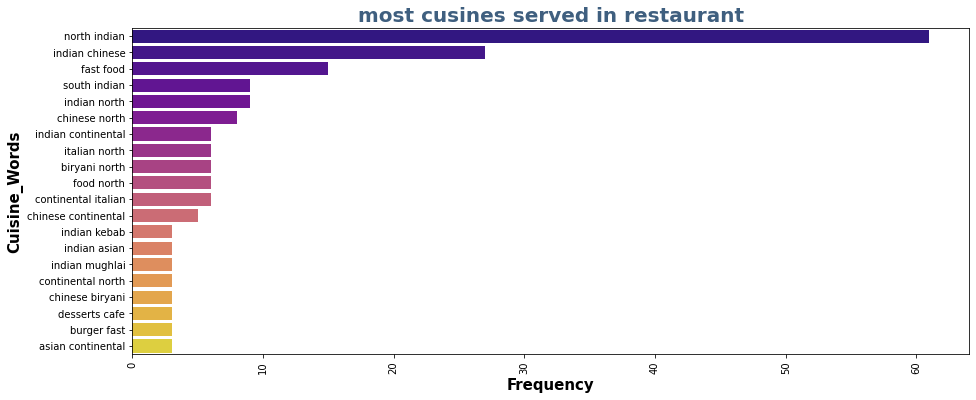

In [36]:
# most cusines served in restaurant
plt.figure(figsize=(15,6))
y = word_freq_20['Cuisine_Words']
x = word_freq_20['Frequency']
plt.title("most cusines served in restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Cuisine Words",weight='bold',fontsize=15)
plt.xlabel("Frequency",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette="plasma")
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

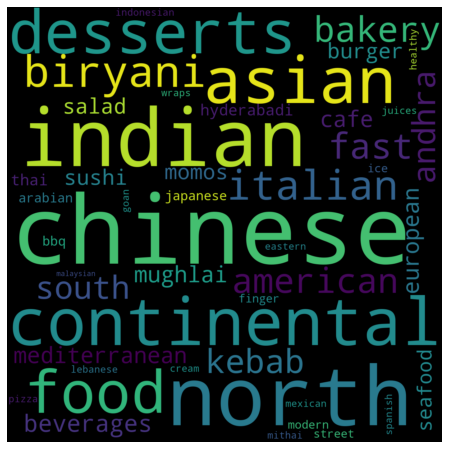

In [37]:
#Wordcloud for Cuisine
plt.figure(figsize=(15,8))
text = " ".join(name for name in word_freq.Cuisine_Words )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

# EDA on reviews dataset

**Data Cleaning**

In [38]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [39]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [40]:
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [41]:
review_df.loc[review_df['Rating'] == 'Like'] = np.nan
review_df['Rating']= review_df['Rating'].astype('float64')

In [42]:
print(review_df['Rating'].mean())

3.601044071880333


In [43]:
review_df['Rating'].fillna(3.6, inplace=True)

In [44]:
# split metadata column into 2 columns i.e. Reviews and followers
review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])

<ipython-input-44-f60f3445e38c>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str


In [45]:
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

In [46]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3.0,2.0


In [47]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df = review_df.drop(['Metadata'], axis =1)

In [48]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [49]:
review_df.isnull().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [50]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)

In [51]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [52]:
review_df.reset_index(inplace = True)

In [53]:
review_df.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

In [54]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Ratings')

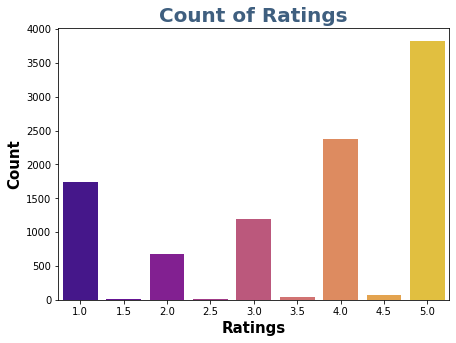

In [55]:
# Countplot of Ratings
plt.figure(figsize=(7,5))
sns.countplot(review_df['Rating'],palette="plasma")
plt.title("Count of Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Ratings",weight='bold',fontsize=15)

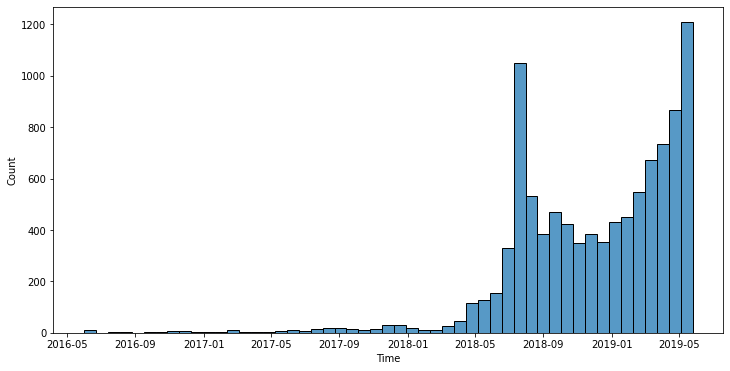

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(review_df.Time)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


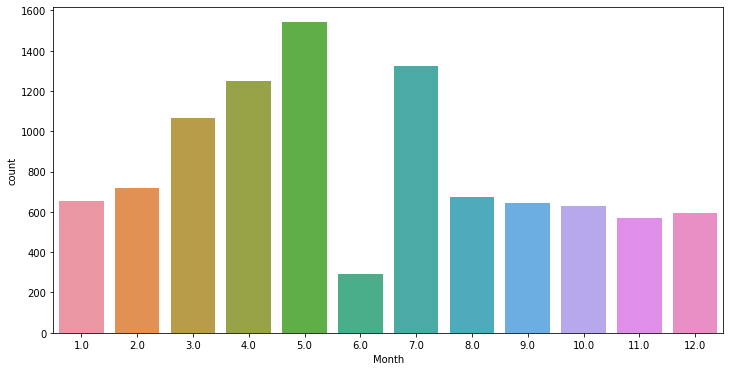

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(review_df.Month)

In [58]:
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

,Reviewer,Review_Count
654,Ankita,13
3855,Parijat Ray,13
2652,Kiran,12
7009,Vedant Killa,11
2311,Jay Mehta,11


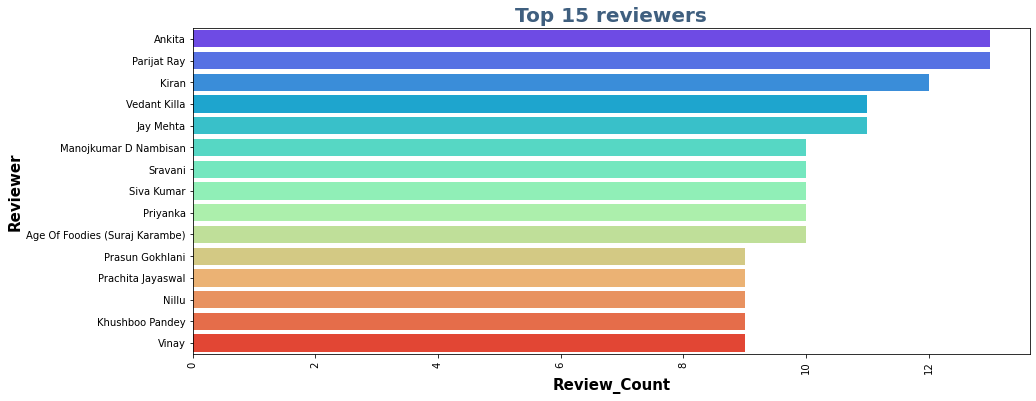

In [59]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

In [60]:
# Average of the ratings of reviewers with review count
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='AverageRatings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15]
top_reviewers_ratings=top_reviewers_ratings.sort_values(by = 'AverageRatings',ascending=False)
top_reviewers_ratings.head()

,Reviewer,Review_Count,AverageRatings
2,Kiran,12,4.500000
11,Prachita Jayaswal,9,4.333333
3,Vedant Killa,11,4.000000
6,Sravani,10,4.000000
10,Prasun Gokhlani,9,4.000000


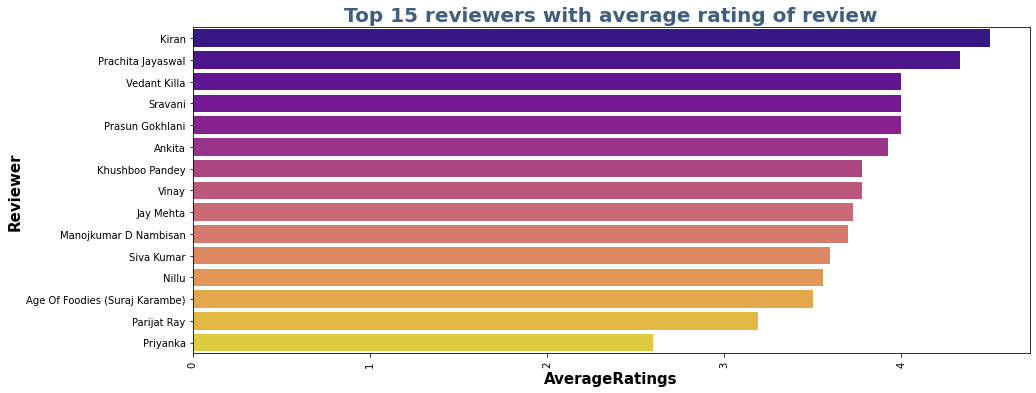

In [61]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['AverageRatings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

In [62]:
# Review per hour
reviews_hour = review_df.groupby('Hour').apply(lambda x: x['Hour'].count()).reset_index(name='Reviews_per_hour')

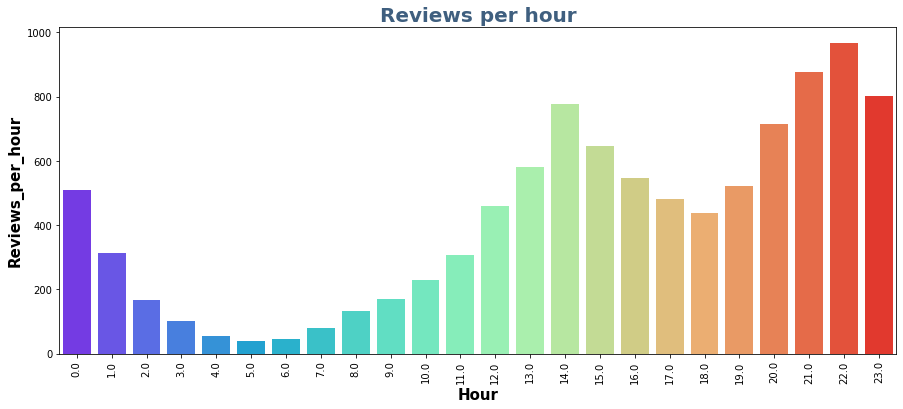

In [63]:
# plotting reviews per hour
plt.figure(figsize=(15,6))
x = reviews_hour['Hour']
y = reviews_hour['Reviews_per_hour']
plt.title("Reviews per hour",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Reviews per hour",weight='bold',fontsize=15)
plt.xlabel("Hour",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

As we can se there is an increase of reviews made from the afternoon to the midnight and then in the morning there is a decrease, but I think this is normal because in during the morning the most of the people is working or is at school

(-0.5, 1399.5, 1399.5, -0.5)

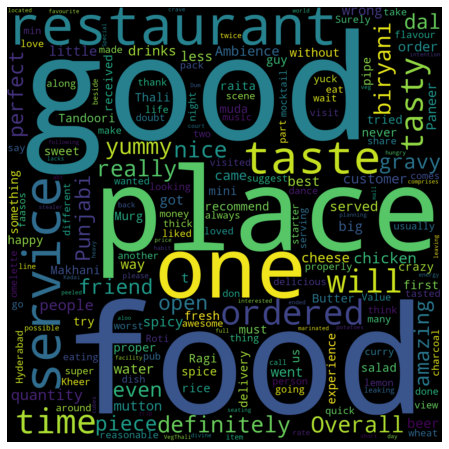

In [64]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

# Text Cleaning
**(Removing punctuation, Removing stopwords, Lemmatization)**

In [65]:
review= review_df.Review
review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [66]:
review_df['Review'] = review_df['Review'].apply(remove_punctuation)

In [67]:
review_df['Review'] = review_df['Review'].apply(stopwords)

In [68]:
review=review_df.Review
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappointed us food courteous sta...
9951    bad rating mainly chicken bone found veg food ...
9952    personally love prefer chinese food couple tim...
9953    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [69]:
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [70]:
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [71]:
review=lemmatization_(review)

<ipython-input-70-667b12675f09>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[index]=' '.join(l)


In [72]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [73]:
review=remove_spaces(review)

<ipython-input-72-96856ab14288>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text[index]=" ".join(x.split())


In [74]:
# storing the reviews in a feature of df
review_df['Review']=review
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [75]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [76]:
#removing words greater than 45 and less than 2
review_df['Review']=review_df['Review'].apply(lambda x:len_less_than2(x))

In [77]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


# Sentiment Analysis

**Sentiment Analysis of review**

In [78]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [79]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [80]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [81]:
#Create two new columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

In [82]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [83]:
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

In [84]:
# plot the polarity and subjectivity
fig = px.scatter(review_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

In [85]:
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is

In [86]:
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Subjectivity,Polarity,Analysis
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0,0.720000,0.660000,Positive
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0,0.691667,0.708333,Positive
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0,0.675000,0.550000,Positive
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0,0.675000,0.750000,Positive
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0,0.566667,0.600000,Positive


In [87]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment

In [88]:
review_df['Analysis']=review_df['Analysis'].apply(lambda x:sentiment(x))

In [89]:
sentiment_df= review_df[['Review','Rating','Analysis']]
sentiment_df.head()

,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,must try great food great ambience thnx servic...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0


In [90]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [92]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

# MultinomialNB

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()

In [95]:
#training the model
model.fit(X_train,y_train)

MultinomialNB()

In [96]:
#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [97]:
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the train data is :")
  print(classification_rep)

In [98]:
model_details(y_train, y_test, y_pred_train, y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8338914936369726
Test accuracy is: 0.8240257131378064
--------------------------------------------------


NameError: ignored